In [3]:
#Importing required Libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Assigning variables to Keys and Tokens
consumerKey = 'your_key'
consumerSecret = 'your_secret_key'
accessToken = 'your_access_token'
accessSecret = 'your_access_secret_token'

In [5]:
#create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey,consumerSecret)

#set the access token and access token secret
authenticate.set_access_token(accessToken,accessSecret)

#create the api object while passing the auth info
api = tweepy.API(authenticate, wait_on_rate_limit=True)

In [6]:
#Print last 5 tweets
posts = api.user_timeline(screen_name = "elonmusk",count = 100,lang = "en",tweet_mode = "extended")
i = 1
for tweet in posts[0:5]:
  print(str(i)+" ) "+tweet.full_text+'\n')
  i+=1


1 ) @ID_AA_Carmack There is already bidirectional communication between human &amp; AI via phones &amp; computers. It’s just lossy &amp; very slow (especially output)

2 ) @Erdayastronaut @PPathole @SpaceX Above 50% likely to make it

3 ) @PPathole @SpaceX This is a test engine. Flight articles are fixed with no gimbal.

4 ) @SpaceX Worth noting that thrust is only slightly higher with the big bell nozzle version. Larger bell is primarily for efficiency in vacuum. Aiming for 380+ sec Isp for RVac long-term. Initially likely to be ~372.

5 ) RT @SpaceX: The first Raptor Vacuum engine (RVac) for Starship has shipped from SpaceX’s rocket factory in Hawthorne, California to our dev…



In [7]:
#Create a data frame with a column called tweets

df = pd.DataFrame( [tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,@ID_AA_Carmack There is already bidirectional ...
1,@Erdayastronaut @PPathole @SpaceX Above 50% li...
2,@PPathole @SpaceX This is a test engine. Fligh...
3,@SpaceX Worth noting that thrust is only sligh...
4,RT @SpaceX: The first Raptor Vacuum engine (RV...


In [8]:
 # Clean  the text

 #Function to clean the text
 def cleanText(text):
   text = re.sub(r'@[A-Za-z0-9]+','',text) # removing @mentions
   text = re.sub(r'#','',text) #removing '#'
   text = re.sub(r'RT[\s]+','',text) #removing RT
   text = re.sub(r'https?:\/\/\S+','',text)#removing hyperlinks

   return text

#Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanText)

#Show the clean text
df

,Tweets
0,_AA_Carmack There is already bidirectional com...
1,Above 50% likely to make it
2,This is a test engine. Flight articles are f...
3,Worth noting that thrust is only slightly hig...
4,: The first Raptor Vacuum engine (RVac) for St...
...,...
95,
96,Was just there &amp; weather was calm. Sure ...
97,Tesla brake lights are powered by a miniverse...
98,Exactly


In [9]:
#create subjectivity of the tweet
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#create polarity of the tweet
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns 
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new data frame
df

,Tweets,Subjectivity,Polarity
0,_AA_Carmack There is already bidirectional com...,0.540000,-0.130000
1,Above 50% likely to make it,0.550000,0.000000
2,This is a test engine. Flight articles are f...,0.200000,0.100000
3,Worth noting that thrust is only slightly hig...,0.477778,0.093519
4,: The first Raptor Vacuum engine (RVac) for St...,0.166667,0.120833
...,...,...,...
95,,0.000000,0.000000
96,Was just there &amp; weather was calm. Sure ...,0.819444,0.462500
97,Tesla brake lights are powered by a miniverse...,0.000000,0.000000
98,Exactly,0.250000,0.250000


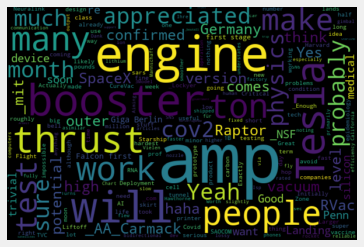

In [10]:
#Plot the word cloud
allwords = ''.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 600,height = 400,random_state = 21,max_font_size=120).generate(allwords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [11]:
#Function to calcuate analysis
def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

#Add the analysis column
df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show the data frame
df

,Tweets,Subjectivity,Polarity,Analysis
0,_AA_Carmack There is already bidirectional com...,0.540000,-0.130000,Negative
1,Above 50% likely to make it,0.550000,0.000000,Neutral
2,This is a test engine. Flight articles are f...,0.200000,0.100000,Positive
3,Worth noting that thrust is only slightly hig...,0.477778,0.093519,Positive
4,: The first Raptor Vacuum engine (RVac) for St...,0.166667,0.120833,Positive
...,...,...,...,...
95,,0.000000,0.000000,Neutral
96,Was just there &amp; weather was calm. Sure ...,0.819444,0.462500,Positive
97,Tesla brake lights are powered by a miniverse...,0.000000,0.000000,Neutral
98,Exactly,0.250000,0.250000,Positive


In [12]:
#Print all the positive tweets
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
j = 1
for i in range(0,sortedDF.shape[0]):
  if sortedDF['Polarity'][i] > 0:
    print(str(j) + " ) "+sortedDF['Tweets'][i])
    print()
    j+=1

1 )   This is a test engine. Flight articles are fixed with no gimbal.

2 )  Worth noting that thrust is only slightly higher with the big bell nozzle version. Larger bell is primarily for efficiency in vacuum. Aiming for 380+ sec Isp for RVac long-term. Initially likely to be ~372.

3 ) : The first Raptor Vacuum engine (RVac) for Starship has shipped from SpaceX’s rocket factory in Hawthorne, California to our dev…

4 ) Model 3 rated as most reliable car 

5 ) Turns out you can make anything fly haha 

6 )   Exactly. This is not fully appreciated.

7 )  Starship SN6 flew asimilar hop to SN5, but it was a much smoother &amp; faster operation

8 ) Great trip to Germany. Support from government &amp; people is super appreciated!

9 ) : Deployment of 60 Starlink satellites confirmed 

10 )   Trust ur butt haha

11 ) _Alarms Just go through resonant modes fast. It’s when you hang out there that problems arise.

12 ) _mit     The outer ring of booster engines (20 of 28) have no TVC actuator

In [13]:
#Print all the positive tweets
sortedDF = df.sort_values(by=['Polarity'])
j = 1
for i in range(0,sortedDF.shape[0]):
  if sortedDF['Polarity'][i] < 0:
    print(str(j) + " ) "+sortedDF['Tweets'][i])
    print()
    j+=1

1 ) _AA_Carmack There is already bidirectional communication between human &amp; AI via phones &amp; computers. It’s just lossy &amp; very slow (especially output)

2 )  Chart understates lithium-ion potential by roughly 1/3

3 )  _mit     Over time, outer 20 will have ~300 tons of thrust &amp; inner 8 ~210, so roughly 7500 tons total at sea level or 1.5 T/W for booster+ship

4 )   Sorry, sir I think I have momentinertiaphobia

5 )  Tesla Germany designed &amp; built the vaccine RNA printers for CureVac, but, subject to some CureVac IP, they could be made for other companies too

6 )  It is unfortunately common for many in academia to overweight the value of ideas &amp; underweight bringing them to fruition. For example, the idea of going to the moon is trivial, but going to the moon is hard.

7 ) _vaux    People are extremely unlikely to die of Covid/sars-cov2 alone. If you have multiple pre-existing health conditions &amp; a weak immune system, then you have significant mortality ris

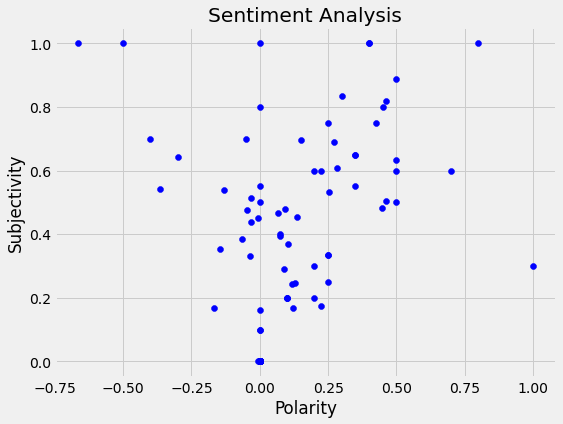

In [14]:
#plot subjectivity and polarity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color="Blue")

plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [15]:
#Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0] / df.shape[0]*100),1)

44.0

In [16]:
#Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0] / df.shape[0]*100),1)

16.0

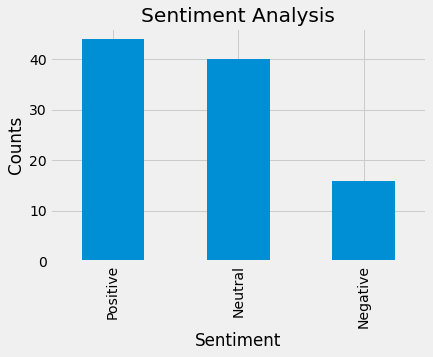

In [18]:
#Show the value counts
df['Analysis'].value_counts()

#Plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind="bar")
plt.show()